In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from math import *
from random import shuffle, randint, random

In [2]:
img = cv.imread('./puffin.jpg')

# Original Image

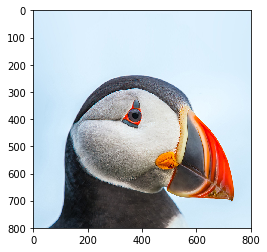

In [3]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Simple Painting

In [ ]:
stroke_width = 3
stroke_length = 10
stroke_angle = pi / 4.0

sample_freq = 5
ratio = 1.0 / sample_freq
down_sample = cv.resize(img, (0,0), fx=ratio, fy=ratio, interpolation=cv.INTER_LINEAR)

height = down_sample.shape[0]
width = down_sample.shape[1]

x_offset = int(cos(stroke_angle) * stroke_length)
y_offset = int(sin(stroke_angle) * stroke_length)

simple_img = np.zeros(img.shape)

ordering = []
for y in range(height):
    for x in range(width):
        ordering.append((x, y))

shuffle(ordering)
        
for pos in ordering:
    x = pos[0]
    y = pos[1]
    pos1 = (int(x / ratio), int(y / ratio))
    pos2 = (pos1[0] - x_offset, pos1[1] - y_offset)
    simple_img = cv.line(simple_img, pos1, pos2, down_sample[y][x].astype(int), stroke_width, lineType=cv.LINE_AA)

In [ ]:
cv.imwrite('simple.png', simple_img)
simple_img = cv.imread('simple.png')
plt.imshow(cv.cvtColor(simple_img, cv.COLOR_BGR2RGB))

# Pertubed Strokes

In [ ]:
stroke_width_range = [4, 5]
stroke_length_range = [8, 20]

stroke_angle = pi / 4.0
stroke_angle_range = [- pi / 12, pi / 12]

intensity_range = [0.85, 1.15]

sample_freq = 2
ratio = 1.0 / sample_freq
down_sample = cv.resize(img, (0,0), fx=ratio, fy=ratio, interpolation=cv.INTER_LINEAR)

height = down_sample.shape[0]
width = down_sample.shape[1]

perturbed_img = np.zeros(img.shape)

ordering = []
for y in range(height):
    for x in range(width):
        ordering.append((x, y))

shuffle(ordering)
        
for pos in ordering:
    stroke_length = randint(stroke_length_range[0], stroke_length_range[1])
    stroke_width = randint(stroke_width_range[0], stroke_width_range[1])
    
    angle = stroke_angle + stroke_angle_range[0] + ((stroke_angle_range[1] - stroke_angle_range[0]) * random())
    
    x_offset = int(cos(angle) * stroke_length)
    y_offset = int(sin(angle) * stroke_length)
    
    x = pos[0]
    y = pos[1]
    
    colour = down_sample[y][x].astype(int) + np.random.randint(31, size=(3,)) - 15
    colour = colour * (intensity_range[0] + ((intensity_range[1] - intensity_range[0]) * random()))
    colour = np.clip(colour, a_min=0, a_max=255)
    
    pos1 = (int(x / ratio), int(y / ratio))
    pos2 = (pos1[0] - x_offset, pos1[1] - y_offset)
    perturbed_img = cv.line(perturbed_img, pos1, pos2, colour, stroke_width)

In [ ]:
cv.imwrite('perturbed.png', perturbed_img)
perturbed_img = cv.imread('perturbed.png')
plt.imshow(cv.cvtColor(perturbed_img, cv.COLOR_BGR2RGB))

# Edge Clipped Strokes

In [4]:
# 1 - Map the intensity of the original image
intensity_layer = (((img[:,:,0] * 11.0) + (img[:,:,1] * 59.0) + (img[:,:,2] * 30.0)) / 100.0).astype('uint8')
intensity_map = np.stack([np.array(intensity_layer) for i in range(3)], axis=2)

# 2 - Smooth the image with a gaussian filter
blurred_intensity = cv.GaussianBlur(intensity_map,(11,11),0)

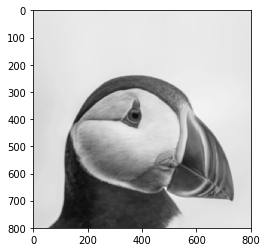

In [5]:
plt.imshow(blurred_intensity)

In [6]:
# 3 - Generate edge map of image
grad_x = cv.Sobel(blurred_intensity, cv.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(blurred_intensity, cv.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
        
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Code modified from: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

In [34]:
test = np.zeros((200, 200))

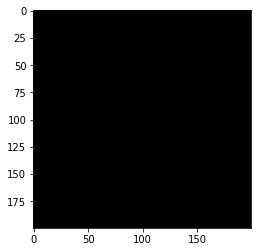

In [35]:
plt.imshow(test, cmap="gray")

In [36]:
lined = cv.line(test, (0, 0), (200, 200), (255, 255, 255))

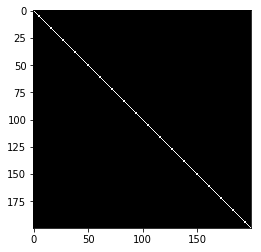

In [37]:
plt.imshow(lined, cmap="gray")

In [38]:
def bounded(size, p):
    if p[0] >= 0 and p[0] < size[0]:
        if p[1] >= 0 and p[1] < size[1]:
            return True
    return False

In [39]:
theta = (3.0 * pi / 4.0) - (pi / 12.0)
delta = 2
p = (150, 50)
max_l = 15

cur_l = 0
cur_p = list(p)

while bounded((200, 200), cur_p) and not lined[cur_p[1], cur_p[0]] == 255:
    cur_l += delta
    x = int(cur_l * cos(theta))
    y = int(cur_l * sin(theta))
    
    cur_p = [cur_p[0] + x, cur_p[1] + y]
    
    lined = cv.line(lined, p, tuple(cur_p), (255, 255, 255))


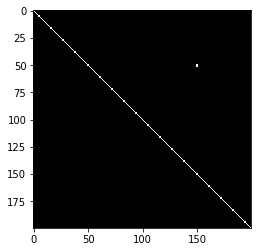

In [40]:
plt.imshow(lined, cmap="gray")